In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

from scipy.io import loadmat
import numpy as np
import neurospyke as ns
import json
import os

In [2]:
f = open('./settings.json')
settings = json.load(f)
f.close()

sampling_frequency = settings['sampling_frequency']
sampling_time = 1 / sampling_frequency
resampling_frequency = settings['resampling_frequency']
resampling_time = 1 / resampling_frequency

frequency_ratio = sampling_frequency / resampling_frequency

signal_duration = settings['signal_duration']

group = settings['group']
subject = settings['subject']
conditions = settings['conditions']
areas = list(settings['areas'].keys())
areas_labels = [settings['areas'][area]['label'] for area in areas]
n_channels = settings['n_channels']
n_stimuli = settings['n_stimuli']

bin_duration = settings['IFR_bin_duration']
trial_duration = settings['trial_duration']
trial_duration_view = settings['trial_duration_view']
trial_samples = np.floor(trial_duration_view * sampling_frequency).astype(np.int_)

In [3]:
# Settings
conditions_idx = 0
areas_idx = 0

In [4]:
data = loadmat(os.path.join('./output', group, subject, subject + '.mat'))
spike_trains = data['spike_trains']

[]
[]
[]
[]
[]
[]


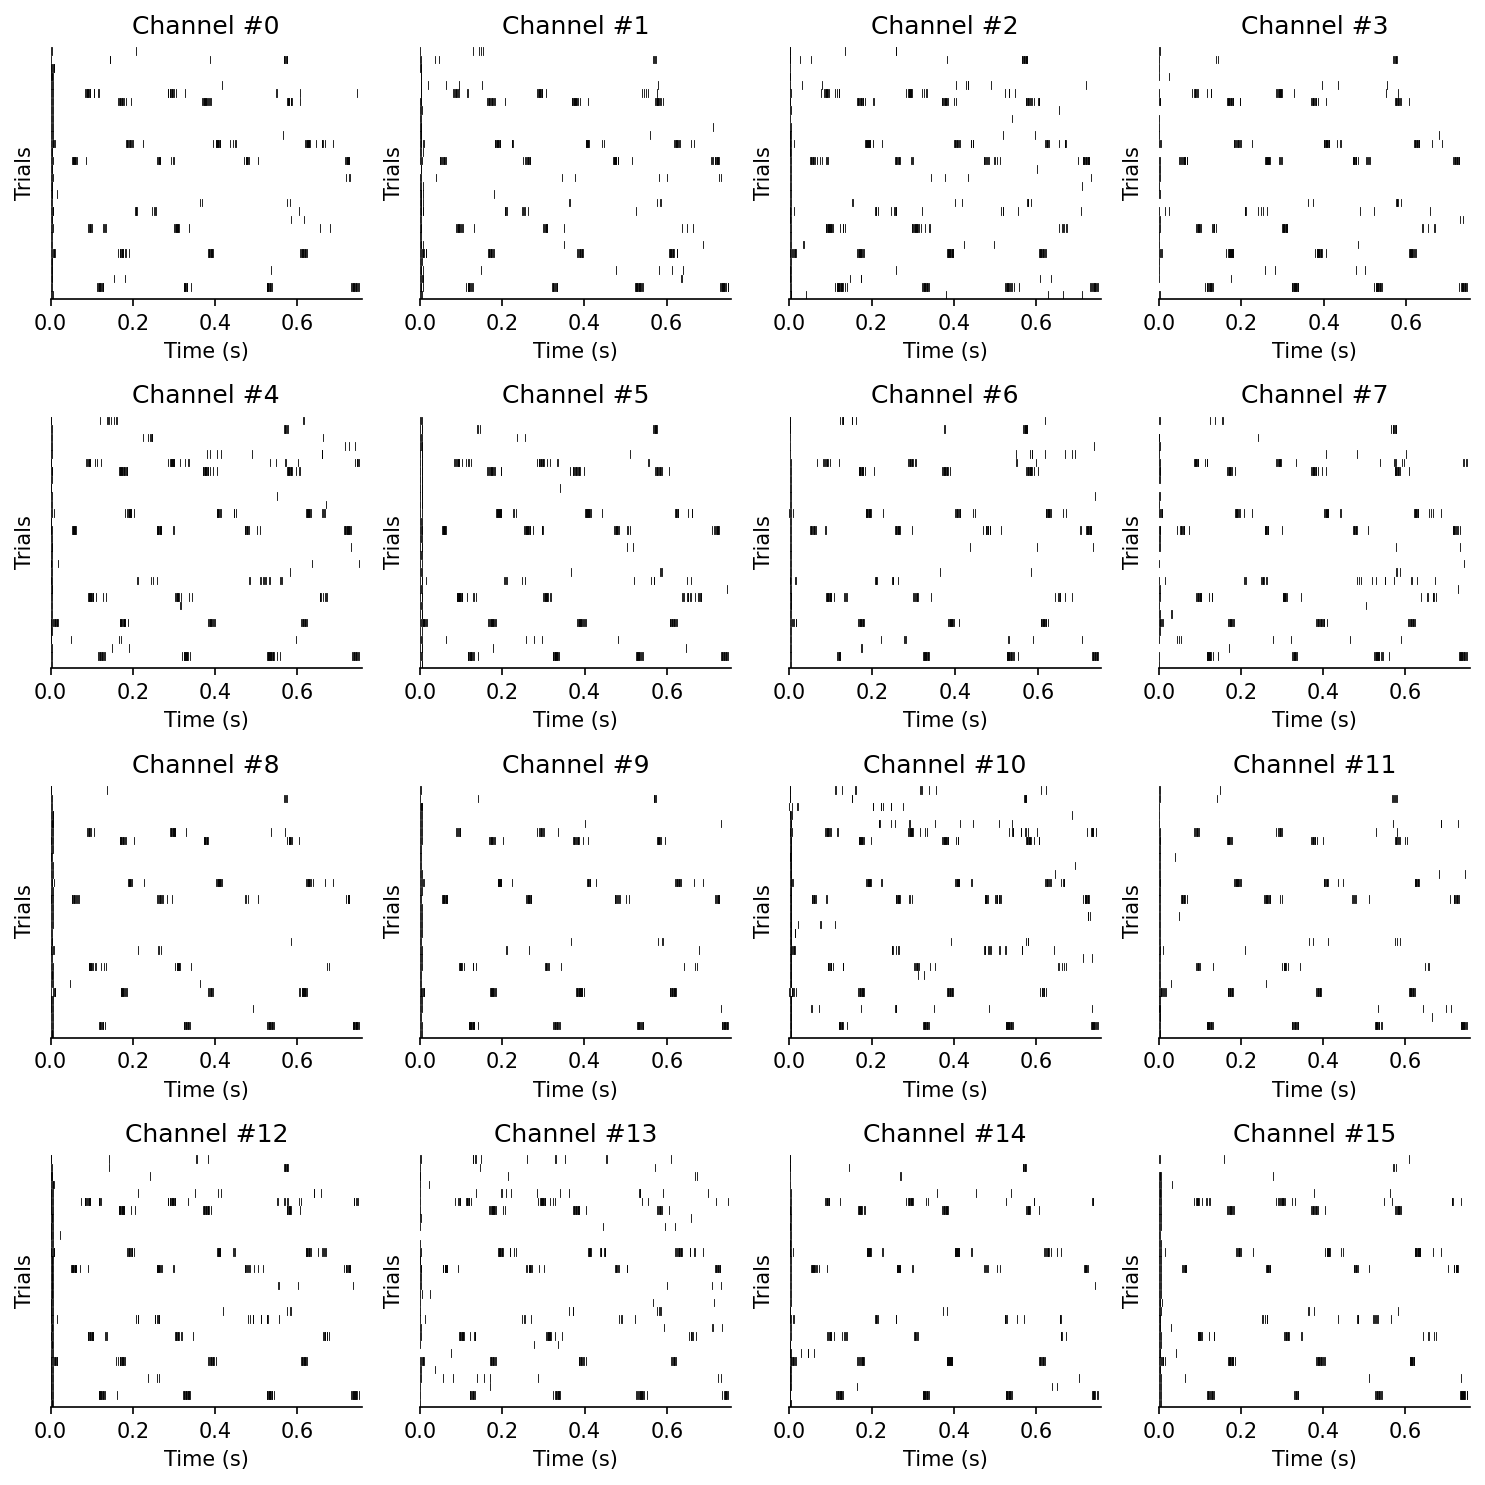

In [17]:
n_cols = 4
n_rows = int(np.ceil(n_channels / n_cols))
fig, axs = ns.visualization.pyplot.subplots(n_rows, n_cols, figsize=(10, 10), dpi=150)

for channel in np.arange(n_channels):
    spike_train_trials = spike_trains[conditions_idx, areas_idx, channel, :, 0:trial_samples]
    spikes_idxs = []
    for idx in np.arange(np.size(spike_train_trials, 0)):
        spikes_idxs.append(ns.utils.convert_spike_train_to_spikes_idxs(spike_train_trials[idx]))

    row = int(np.floor(channel / n_cols))
    col = channel % n_cols

    ns.visualization.plot_spike_train(spikes_idxs, sampling_time=sampling_time, ax=axs[row, col], title='Channel #' + str(channel), channel_labels=None, ylabel='Trials', reverse=True, vertical_spacing=0.1, linewidth=0.4)

ns.visualization.pyplot.tight_layout()